# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The dataset we are analysing is the TMDb movie data, a quick view of the csv file with Excel shows us that the data contains about 10000 of these information: movie ID, imdb ID, popularity, budget, revenue, movie title, a list of casts, homepage url, director, tagline, keywords, overview, runtime in minutes, a list of genres, a list of production companies, release dates, vote counts, vote averages, release years and adjusted budget and revenue considering inflation over the years, in term of 2010 dollars.

In [204]:
# Importing the libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties
Let's load and read out the first few lines of the dataset, and also the number of enties and data types.

In [205]:
# Load dataset
df = pd.read_csv('tmdb-movies.csv')
df.head(3)


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We can see that the release_date is a string type and the data needs to be changed to a time data type. Cast, genres, production company needs to separate the values connected with '|'. Let's also see a summary of the number data.

In [207]:

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Some columns that are probably not going to be used are: id, imdb_id, cast,homepage,tagline, overview.
From the above table we can see that at least half of the data have 0 budgets and revenue. It is impractical to replace them with mean value, they have to be removed when we are analyzing budgets and revenues. However, removing so much data has a negative effect on our analysis, with data points already not so much. So whenever we are dealing with properties other than budget or revenue we will restore these data.
Also we will use adjusted budget and revenue so let's drop the budget and revenue.
The minimun run time is 0, maximum is 900. Both are unreasonable numbers indicating bad data points.

### Data Cleaning - remove duplicates, fix incorrect data types ###

In [208]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df.drop(['id','budget','revenue', 'imdb_id','cast','homepage','tagline', 'overview'], axis = 1, inplace = True)

We drop the duplicated rows, which is only one in this database

In [209]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)
df.duplicated().sum()

1


0

I think any movie that is shorter than 20 minutes or longer than 5 hours needs some looking at, lets see if they are bad data points.

In [210]:
df[(df['runtime']>300) | (df['runtime']<20)]

,popularity,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
92,1.876037,Mythica: The Necromancer,A. Todd Smith,sword|magic|sorcery|necromancer,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,12/19/15,11,5.4,2015,0.000000e+00,0.0
100,1.724712,Frozen Fever,Chris Buck|Jennifer Lee,sister sister relationship|birthday|song|birth...,8,Adventure|Animation|Family,Walt Disney Pictures|Walt Disney Animation Stu...,3/9/15,475,7.0,2015,0.000000e+00,0.0
216,0.640151,Lava,James Ford Murphy,pixar animated short|animation|pixar|short,7,Animation|Comedy|Family|Fantasy|Music,Pixar Animation Studios,6/19/15,298,7.3,2015,0.000000e+00,0.0
279,0.442835,Riley's First Date?,Josh Cooley,mother daughter relationship|rock music|girl|f...,5,Animation|Family,Walt Disney Pictures|Pixar Animation Studios,11/3/15,137,7.3,2015,0.000000e+00,0.0
334,0.357654,Ronaldo,Anthony Wonke,biography|soccer player,0,Documentary,"On The Corner Films|We Came, We Saw, We Conque...",11/9/15,80,6.5,2015,0.000000e+00,0.0
343,0.344994,Minions: The Competition,Kyle Balda|Julien Soret,minions,4,Animation,Illumination Entertainment,11/4/15,16,5.9,2015,0.000000e+00,0.0
371,0.422901,Sanjay's Super Team,Sanjay Patel,NaN,7,Animation,Pixar Animation Studios,11/25/15,47,6.9,2015,0.000000e+00,0.0
410,0.097514,Anarchy Parlor,Kenny Gage|Devon Downs,tattoo|tattooing,0,Horror,NaN,1/1/15,15,5.6,2015,0.000000e+00,0.0
445,0.218528,The Exorcism of Molly Hartley,Steven R. Monroe,NaN,0,Horror,WT Canada Productions,10/9/15,52,5.0,2015,0.000000e+00,0.0
456,0.208491,Cosmic Scrat-tastrophe,Mike Thurmeier|Galen T. Chu,NaN,5,Science Fiction|Comedy|Animation|Family,Twentieth Century Fox Film Corporation|Blue Sk...,11/6/15,33,7.7,2015,0.000000e+00,0.0


We can see that for the films shorter than 20 minutes many of them are short animation or student films. While films longer than 5 hours, many of them are documentaries, possibly spanned over several episode. So these points may or may not be removed depends on our purpose. But I would say it is safe to remove movies that are 0 minute runtime.

In [211]:
print(sum(df['runtime']==0))
df = df[df['runtime']!=0]
print(sum(df['runtime']==0))

31
0


Lets split and convert keywords, genres, production companies to arrays and release date to datetime

In [212]:
df.keywords = df.keywords.str.split('|')
df.genres = df.genres.str.split('|')
df.production_companies = df.production_companies.str.split('|')
df.release_date = pd.to_datetime(df.release_date)

In [213]:
df.head()

,popularity,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,J.J. Abrams,"[android, spaceship, jedi, space opera, 3d]",136,"[Action, Adventure, Science Fiction, Fantasy]","[Lucasfilm, Truenorth Productions, Bad Robot]",2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,James Wan,"[car race, speed, revenge, suspense, car]",137,"[Action, Crime, Thriller]","[Universal Pictures, Original Film, Media Righ...",2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


Let's check if release date agrees with release year

In [214]:
df[pd.DatetimeIndex(df['release_date']).year != df['release_year']]

,popularity,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
9719,3.309196,2001: A Space Odyssey,Stanley Kubrick,"[moon, jupiter, artificial intelligence, man v...",149,"[Science Fiction, Mystery, Adventure]","[Stanley Kubrick Productions, Metro-Goldwyn-Ma...",2068-04-05,1708,7.7,1968,7.522756e+07,3.555466e+08
9720,1.152937,Planet of the Apes,Franklin J. Schaffner,"[human evolution, gorilla, bondage, space mari...",112,"[Adventure, Science Fiction, Mystery]","[Twentieth Century Fox Film Corporation, APJAC...",2068-02-07,469,7.2,1968,3.635999e+07,2.093547e+08
9721,1.058272,Night of the Living Dead,George A. Romero,"[loss of father, siblings, midnight movie, zom...",96,[Horror],"[Laurel Group, Off Color Films, Image Ten, Mar...",2068-10-01,279,7.2,1968,7.146619e+05,0.000000e+00
9722,0.891163,The Boston Strangler,Richard Fleischer,"[detective, double life, boston, strangle, ser...",116,"[Crime, Drama, Mystery, Thriller]",[Twentieth Century Fox Film Corporation],2068-10-08,15,6.6,1968,0.000000e+00,0.000000e+00
9723,0.867192,Barbarella,Roger Vadim,"[sexual fantasy, alien planet, distant future,...",98,[Science Fiction],"[Dino de Laurentiis Cinematografica, Marianne ...",2068-10-10,63,5.4,1968,0.000000e+00,0.000000e+00
9724,0.786854,Bullitt,Peter Yates,"[san francisco, hotel, detective, based on nov...",113,"[Action, Crime, Drama, Thriller]","[Solar Productions, Warner Brothers/Seven Arts]",2068-10-17,143,6.7,1968,3.447930e+07,2.651826e+08
9725,0.757746,The Love Bug,Robert Stevenson,"[car race, suicide attempt, sport, golden gate...",107,"[Comedy, Family, Fantasy]",[Walt Disney Productions],2068-12-22,62,5.8,1968,0.000000e+00,0.000000e+00
9726,0.747337,The Lion in Winter,Anthony Harvey,"[england, infidelity, famous score, queen, cas...",134,"[Drama, History]","[AVCO Embassy Pictures, Haworth Productions]",2068-01-01,37,6.9,1968,0.000000e+00,0.000000e+00
9727,0.724527,Rosemary's Baby,Roman Polanski,"[commercial, anti-christ, contemporary setting...",136,"[Horror, Drama, Mystery]","[Paramount Pictures, William Castle Productions]",2068-06-12,448,7.3,1968,2.006068e+07,2.093547e+08
9728,0.698337,Yellow Submarine,George Dunning,"[submarine, fab four, colours, music, blase]",90,"[Animation, Fantasy, Music]","[Apple Corps, King Features Production]",2068-07-17,63,7.0,1968,0.000000e+00,0.000000e+00


It seems that all of the years from 19xx have been mistakenly translated to 20xx. Upon searching the internet, this seems to be a common issue and let's apply a quicky fix found on stackoverflow: https://stackoverflow.com/questions/37766353/pandas-to-datetime-parsing-wrong-year, and change the threshold year to 2020, because obviously  a movie cannot be released in the future.

In [215]:
from datetime import timedelta, date
col = 'release_date'
df[col] = pd.to_datetime(df[col])
future = df[col] > date(year=2020,month=1,day=1)
df.loc[future, col] -= timedelta(days=365.25*100)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.
  after removing the cwd from sys.path.


In [216]:
df[pd.DatetimeIndex(df['release_date']).year != df['release_year']]

,popularity,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


Although it threw out a warning, that seems to have fixed the issue. Let's have a look at the final cleaned data

In [217]:
df.head(3)

,popularity,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Colin Trevorrow,"[monster, dna, tyrannosaurus rex, velociraptor...",124,"[Action, Adventure, Science Fiction, Thriller]","[Universal Studios, Amblin Entertainment, Lege...",2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,George Miller,"[future, chase, post-apocalyptic, dystopia, au...",120,"[Action, Adventure, Science Fiction, Thriller]","[Village Roadshow Pictures, Kennedy Miller Pro...",2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,Robert Schwentke,"[based on novel, revolution, dystopia, sequel,...",119,"[Adventure, Science Fiction, Thriller]","[Summit Entertainment, Mandeville Films, Red W...",2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : What properties are associated with movies with high revenues?

Because there are so many data with 0 revenues, lets make a copy of the dataset but remove any data with 0 revenue.

In [218]:
df_2 = df[df['revenue_adj']!=0]
len(df) - len(df_2)

5985

5985 data have been removed, which is over half of the total data points, this will greatly affect our analysis. So unless we are analysing revenue/budget we will restore these data.
Before going through the data, let's do some observations. For example, we could imagine generally speaking higher budget, higher popularity would be related to a higher revenue. However, the release year or runtime may have less effect.

Let's plot the budget against the revenue in a scatter plot.

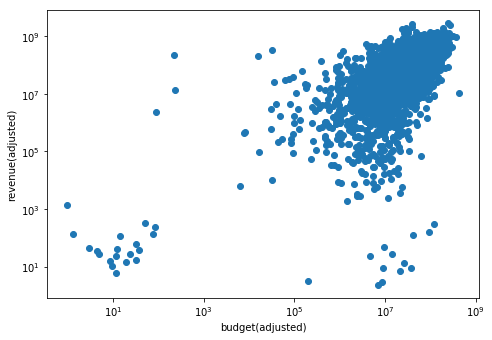

In [219]:
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('budget(adjusted)')
ax.set_ylabel('revenue(adjusted)')
ax.scatter(df_2['budget_adj'], df_2['revenue_adj']);

The plot was not so clear in a linear scale but in log scale it is very clear that with a higher budget, the revenues are higher.
Let's plot some other parameters of interests (popularity, vote_average, runtime and release_year):

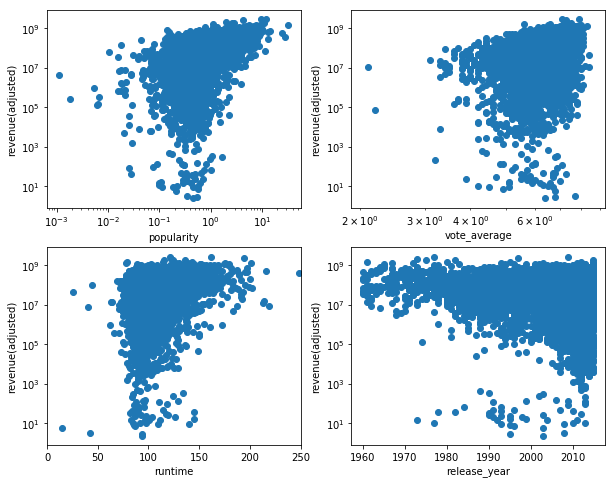

In [220]:
fig,ax = plt.subplots(2,2,figsize = (10,8))
ax[0,0].set_xscale('log')
ax[0,0].set_yscale('log')
ax[0,0].set_xlabel('popularity')
ax[0,0].set_ylabel('revenue(adjusted)')
ax[0,0].scatter(df_2['popularity'], df_2['revenue_adj'])

ax[0,1].set_xscale('log')
ax[0,1].set_yscale('log')
ax[0,1].set_xlabel('vote_average')
ax[0,1].set_ylabel('revenue(adjusted)')
ax[0,1].scatter(df_2['vote_average'], df_2['revenue_adj'])

ax[1,0].set_xscale('linear')
ax[1,0].set_yscale('log')
ax[1,0].set_xlabel('runtime')
ax[1,0].set_xlim([0,250])
ax[1,0].set_ylabel('revenue(adjusted)')
ax[1,0].scatter(df_2['runtime'], df_2['revenue_adj'])

ax[1,1].set_xscale('linear')
ax[1,1].set_yscale('log')
ax[1,1].set_xlabel('release_year')
ax[1,1].set_ylabel('revenue(adjusted)')
ax[1,1].scatter(df_2['release_year'], df_2['revenue_adj']);

We can see that there is definitely a positive correlation between popularity/vote_average/runtime and revenue, however for release year it seems a little unsure, because the maximum at more present years are higher while the minimun are also lower. We can also imagine the number of films are much larger for more recent times.
Let's see what is the movie count and the mean of budget and revenue trend over the years.

In [221]:
df_year_mean = df_2.groupby(['release_year']).mean()
df_year_count = df_2.groupby(['release_year']).count()

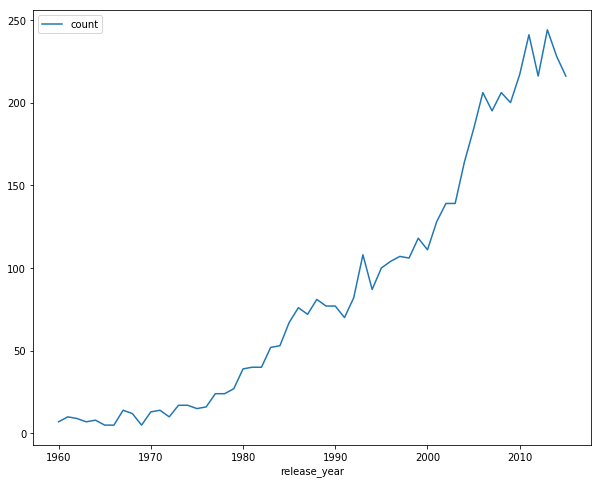

In [222]:
ax = df_year_count.plot(y=['budget_adj'], figsize = (10,8))
ax.legend(['count']);

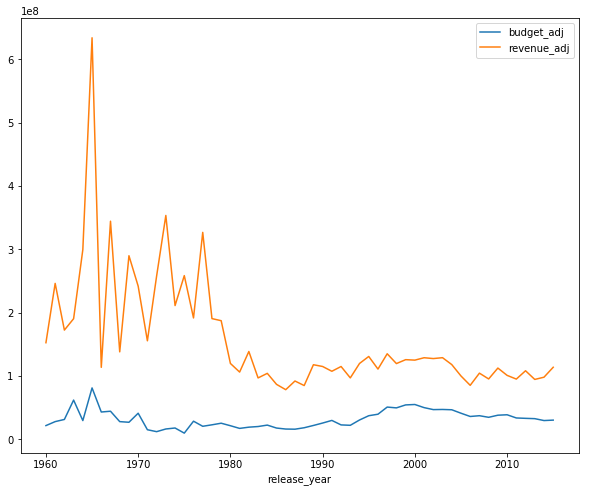

In [225]:
df_year_mean.plot(y=['budget_adj','revenue_adj'], figsize = (10,8));

For the valid revenue data in this dataset, the number of films increases over the year. The average revenue drops around year 1978 - 1985. However except for that there isn't an obvious trend for the revenue.

### Research Question 2: Which genres are most popular from year to year?

Let's go back to the original dataset since we are not dealing with revenues now. The genre data is now in an array of strings, however it is still pretty hard to handle. We can use an "explode" function taken from stackoverflow:https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
to separate the arrays into individual rows. Also for simplicity lets only get the year and genre column.

In [226]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

Let's make a copy of this data, since we may reshape and modify the data even more, and let's check the entries again.

In [227]:
df_genre = df[['release_year','genres']].copy()
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10834 entries, 0 to 10865
Data columns (total 2 columns):
release_year    10834 non-null int64
genres          10812 non-null object
dtypes: int64(1), object(1)
memory usage: 253.9+ KB


There are 22 null values in the genres column, let's drop them.

In [228]:
df_genre.dropna(inplace = True)
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10812 entries, 0 to 10865
Data columns (total 2 columns):
release_year    10812 non-null int64
genres          10812 non-null object
dtypes: int64(1), object(1)
memory usage: 253.4+ KB


Let's check if the genre values are indeed separated.

In [229]:
df_exploded = explode(df_genre, ['genres'])
df_exploded.head(3)

,release_year,genres
0,2015,Action
1,2015,Adventure
2,2015,Science Fiction


I think it will be way too much plot if we plot out all the genres on every single year. Let's see the sum of genres over decades to see how people's tastes changed over the decades. First, let's observe what are the genres, if there are any bad entries or different entries stating the same thing and what are the counts.

In [230]:
df_exploded['genres'].value_counts()

Drama              4751
Comedy             3782
Thriller           2905
Action             2382
Romance            1705
Horror             1629
Adventure          1470
Crime              1353
Family             1229
Science Fiction    1228
Fantasy             915
Mystery             808
Animation           699
Documentary         517
Music               401
History             334
War                 270
Foreign             187
Western             165
TV Movie            164
Name: genres, dtype: int64

All the entries seem to be valid, and we can already see that the most filmed genres are drama and comedy.
Let's create another column which is the year converted to the decade.

In [231]:
df_exploded['decade'] = df_exploded['release_year']//10*10
df_exploded.head()

,release_year,genres,decade
0,2015,Action,2010
1,2015,Adventure,2010
2,2015,Science Fiction,2010
3,2015,Thriller,2010
4,2015,Action,2010


We plot out the ratio of genres from each decade in a pie plot, to see which genre is the most popular in each decade.

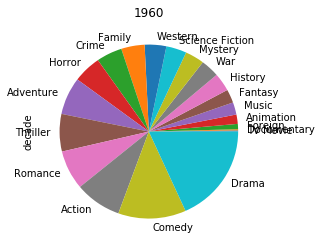

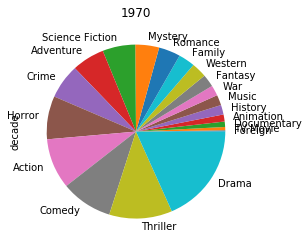

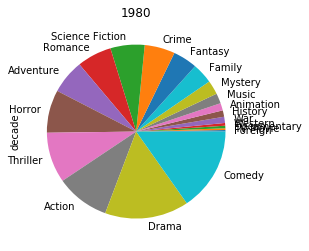

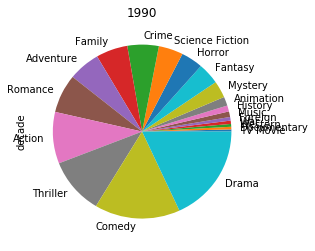

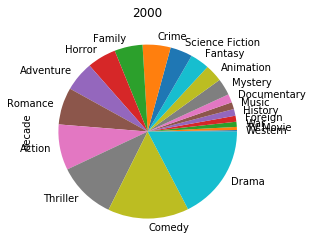

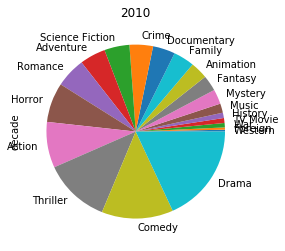

In [232]:
decades = df_exploded['decade'].unique()
decades.sort()
for i in range(len(decades)):
    decade = decades[i]
    genre_popularity = df_exploded[df_exploded['decade'] == decade]
    genre_popularity = (genre_popularity.groupby('genres').sum().sort_values(by = 'decade'))
    genre_popularity.plot(kind='pie', y = 'decade', figsize=(4,4),legend = None);
    plt.title(decade)

We can see that drama and comedy have always been the most popular genres.

<a id='conclusions'></a>
## Conclusions

Using this dataset from TMDb movie data, we proposed the following questions: 1. What properties are associated with high revenues? 2. What genres are most popular from year to year?

To answer the first question, we plotted out the correlation between revenue and other properties including budget, popularity, average ratings, release year, and runtime. We found that:

1. There is a clear positive correlation between movie budget and revenue, the movies with a higher budget tend to perform better than those with a lower budget. 

2. The data also suggests positive correlation between popularity and revenue, showing that popular movies are more profitable. There is also a positive correlation between runtime and revenue. However, with some speculation, we can say there may be not a direct cause and effect between these two because firstly, most movies are around 100 minutes, much shorter animation or student films or longer documentaries tend to target completely different audiences.

3. The average revenue shows a drop around 1978 - 1985. Except for that, there isn't an obvious correlation between publication time and revenue.

To answer the second question, we analysed the ratio of appearance of each genres for every decade. We found that:

1. Drama and comedy genre are consistently the most popular genres over the decades, with Drama being the most popular except for the 1980s.

In [233]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0